# Module 6: Spark 2

# Introduction

This module builds on the previous Spark modules with a focus on putting machine learning applications into production, writing test cases, and making pipelines fast.

# Learning Outcomes

In this module, you will build skills in:

* Machine learning with Spark’s machine learning library (MLlib) 
* Preparing production applications
* Testing your code
* Avoiding operations that will be slow on large datasets


# Readings and Resources

We invite you to supplement this notebook with the following:

* **Machine Learning Library (MLlib) Guide**: https://spark.apache.org/docs/latest/ml-guide.html


* **Beyond Unit Tests: End-to-End Testing for Spark Workflows** [Spark Summit (2017), video: 30:56]: Testing for Spark/Hadoop Workflows. Organized by Databricks. https://databricks.com/session/beyond-unit-tests-end-to-end-testing-for-spark-workflows. Alternatively, you may view on YouTube: https://www.youtube.com/watch?v=L8lANUOa2g0

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-6:-Spark-2" data-toc-modified-id="Module-6:-Spark-2">Module 6: Spark 2</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Machine-Learning-with-Spark" data-toc-modified-id="Machine-Learning-with-Spark">Machine Learning with Spark</a></span>
<ul class="toc-item">
<li><span><a href="#MLlib-concepts" data-toc-modified-id="MLlib-concepts">MLlib concepts</a></span>
</li>
<li><span><a href="#Spark-pipelines-in-production" data-toc-modified-id="Spark-pipelines-in-production">Spark pipelines in production</a></span>
<ul class="toc-item">
<li><span><a href="#Spark-in-Cluster-mode" data-toc-modified-id="Spark-in-Cluster-mode">Spark in Cluster mode</a></span>
<ul class="toc-item">
<li><span><a href="#Submitting-Spark-applications" data-toc-modified-id="Submitting-Spark-applications">Submitting Spark applications</a></span>
</li>
</ul>
</li>
<li><span><a href="#Spark-in-Standalone-mode" data-toc-modified-id="Spark-in-Standalone-mode">Spark in Standalone mode</a></span>
</li>
</ul>
</li>
<li><span><a href="#Building-your-application's-dependencies" data-toc-modified-id="Building-your-application's-dependencies">Building your application's dependencies</a></span>
<ul class="toc-item">
<li><span><a href="#Structuring-jobs" data-toc-modified-id="Structuring-jobs">Structuring jobs</a></span>
</li>
<li><span><a href="#Packaging-and-automating" data-toc-modified-id="Packaging-and-automating">Packaging and automating</a></span>
</li>
<li><span><a href="#Dependencies-on-third-party-libraries" data-toc-modified-id="Dependencies-on-third-party-libraries">Dependencies on third party libraries</a></span>
</li>
</ul>
</li>
<li><span><a href="#Unit-testing" data-toc-modified-id="Unit-testing">Unit testing</a></span>
</li>
<li><span><a href="#Testing-PySpark-programs" data-toc-modified-id="Testing-PySpark-programs">Testing PySpark programs</a></span>
</li>
<li><span><a href="#General-tips-for-writing-efficient-Spark-programs" data-toc-modified-id="General-tips-for-writing-efficient-Spark-programs">General tips for writing efficient Spark programs</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Machine Learning with Spark

As we learned in an earlier module, MLlib is Spark’s Machine Learning (ML) library. Its goal is to make practical machine learning scalable and easy. At a high level, it provides tools such as:

- **ML Algorithms**: Common learning algorithms such as classification, regression, clustering, and collaborative filtering


- **Featurization**: Feature extraction, transformation, dimensionality reduction, and selection


- **Pipelines**: Tools for constructing, evaluating, and tuning ML pipelines


- **Persistence**: Tools for saving and loading algorithms, models, and pipelines


- **Utilities**: Tools for linear algebra, statistics, data handling, etc.

## MLlib concepts

MLlib standardizes APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline, or workflow. Here are some terms you will need to be familiar with:

- **DataFrame**: This ML API uses DataFrames from Spark SQL as an ML dataset, which can hold a variety of data types (e.g. a DataFrame could have different columns storing text, feature vectors, true labels, and predictions)


- **Transformer**: A transformer is an algorithm which can transform one DataFrame into another DataFrame


- **Estimator**: An estimator is an algorithm which can be fit on a DataFrame to produce a transformer


- **Pipeline**: A pipeline chains multiple transformers and estimators together to specify an ML workflow


- **Parameter**: All transformers and estimators now share a common API for specifying parameters

**Exercise**

The notebook below shows the full code for exploring two datasets and will introduce linear regression using MLlib. You will also do an exercise on the same topic. Please follow the link, and complete the exercise:

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1896577977217881/932322184146507/6173011382478750/latest.html

## Spark pipelines in production

One of the key problems that we face when working with big data is how to move our machine learning model from experimentation to high-volume production without investing an undue amount of time in review, rework, and reimplementation. This often involves tasks such as packaging, building projects, submitting jobs and deploying jobs.  

Let us start by reviewing how Spark jobs are submitted to a cluster.

### Spark in Cluster mode

Spark applications run as independent sets of processes on a cluster, coordinated by a `SparkContext` object in your main program (called the driver program).

The `SparkContext` can connect to several types of cluster managers (either Spark’s own standalone cluster manager, Hadoop's YARN cluster manager, or others), which allocate processor, disk and memory resources across applications running in the cluster. Once connected, Spark acquires executors on nodes in the cluster, which are processes that run computations and store data for your application. Next, it sends your application code (defined by a Java JAR file or Python files passed to the `SparkContext`) to the executors. Finally, the `SparkContext` sends tasks to the executors to run.


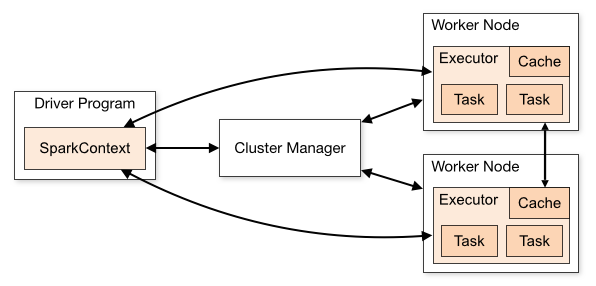

**Source**: http://spark.apache.org/docs/latest/cluster-overview.html

#### Submitting Spark applications

Applications can be submitted to a cluster of any type using the `spark-submit` script.

The `spark-submit` script in Spark’s `bin` directory is used to launch applications in a cluster. This works with any of Spark’s supported cluster managers through a uniform interface, so you don’t have to configure your application specifically for each one. 


A Spark job is submitted with a command such as:

    ./bin/spark-submit examples/src/main/python/pi.py
   
The above command runs PySpark code that calculates the value of pi. The python script is called `pi.py` and can be found here:

- https://github.com/apache/spark/blob/master/examples/src/main/python/pi.py.

Here is the code:


    from __future__ import print_function

    import sys
    from random import random
    from operator import add

    from pyspark.sql import SparkSession


    if __name__ == "__main__":
        """
            Usage: pi [partitions]
        """
        spark = SparkSession\
            .builder\
            .appName("PythonPi")\
            .getOrCreate()

        partitions = int(sys.argv[1]) if len(sys.argv) > 1 else 2
        n = 100000 * partitions

        def f(_):
            x = random() * 2 - 1
            y = random() * 2 - 1
            return 1 if x ** 2 + y ** 2 <= 1 else 0

        count = spark.sparkContext.parallelize(range(1, n + 1), partitions).map(f).reduce(add)
        print("Pi is roughly %f" % (4.0 * count / n))

        spark.stop()


Using the `spark-submit` command ensures that the Spark configuration values (from a properties file) are loaded and passed to the application. The configuration specifies how Spark is to run the application, and often includes the Spark Master URL which identifies which cluster manager you want to use, as well as setting up the `SparkContext`.

Notice that in the above script there are 3 parts:

1. The `SparkSession` (PySpark's object representing a Spark job and a superset of `SparkContext`) is created.<br><br>
    
2. The value of pi is calculated.<br><br>

3. The Spark session is stopped.

You may also pass arguments directly to the `spark-submit` command like in this example:

    ./bin/spark-submit \
      --master spark://207.184.161.138:7077 \
      examples/src/main/python/pi.py \
      1000

Here, the `--master` command line argument refers to the master node. We also pass other command line arguments (in this case, the number of partitions).


Alternatively, you can set the master by explicitly stating the spark configuration, application name and the master right in the Python script itself.
    
    from pyspark import SparkConf
    from pyspark import SparkContext

    conf = SparkConf()
    conf.setMaster('spark://HEAD_NODE_HOSTNAME:7077')
    conf.setAppName('PythonPi')
    sc = SparkContext(conf=conf)

In this case, you could just use the `python` command to run the script and submit the job.

    python pythonpi.py
    

Please refer to the official Anaconda documentation for more details on running a minimal Spark script that imports `pyspark`, initiates the `SparkContext` and performs a distributed calculation:

- https://docs.anaconda.com/anaconda-scale/howto/spark-basic/
  
Here is documentation with more details on PySpark:

- https://spark.apache.org/docs/latest/api/python/getting_started/index.html


### Spark in Standalone mode

Since we are talking about production pipelines, we will assume that we are running Spark in cluster mode (which is usually the case for an on-premises cluster setting). However, it is also possible to develop pipelines and run them in a standalone mode which you could use, for example, to design and test them on a laptop before moving them to the production cluster.

If you are interested in how to submit jobs in a simple standalone deployment mode for exploration purposes, refer to the documentation linked below:

- https://spark.apache.org/docs/latest/spark-standalone.html


## Building your application's dependencies

If your code depends on other projects (for example, say you're using another open source package for part of your program), you will need to package them alongside your application in order to deploy the code to the Spark cluster. For Java and Scala jobs, we create an assembly `jar` file containing Spark code, and build it using the **sbt** or **Maven** build tools. We then use the Java `jar` file to submit the code to the Spark shell.

When building production pipelines in Python, it is normal for your Spark project to contain several python (`.py`) files, and there are often dependencies on other libraries.

We already saw how `spark-submit` works:
    
    spark-submit --py-files pyfile.py,zipfile.zip main.py --arg1 val1

When we submit a job in PySpark, we submit the main Python file (`main.py`) and we can also add a list of dependent files that will be bundled together with our main program.

These dependency files can be `.py` code files, or they can be other kind of files (e.g. `.zip` packages).

A standard template has been attached as a part of this module that can be reused. It can be found in the `spark-submit-with-pyspark-template-master.zip` file. This template can help you get started with the following:

- Running ETL (Extract, Transform, Load) jobs using PySpark (both using `spark-submit` and the interactive shell)
- Creating the `SparkContext` and `SqlContext`
- Using simple command line arguments, and loading all your dependencies (your project source code and third party requirements)

**Source**: BLOG:https://developerzen.com/best-practices-writing-production-grade-pyspark-jobs-cb688ac4d20f Git: https://github.com/ekampf/PySpark-Boilerplate


### Structuring jobs

Structuring our jobs is important. Python can treat a zip file containing modules and functions just like any other directory. 

We just need to add the zip file to its search path.

    import sys
    sys.path.insert(0, jobs.zip)


Assuming `jobs.zip` contains a Python module called `run_job`, we can import that module. For example:

    from jobs.wordcount import run_job
    run_job()
    
This makes it possible for us to build our PySpark project just like any other Python project.

Alternatively, we may also have "jobs" as modules and have a `main.py` as an entry point to our code.  The `main.py` would then parse command line arguments and load the job module to run. The directory structure of the project would then look like:


    ├── README.md
    ├── src
    │   ├── main.py
    │   ├── jobs
    │   │   └── wordcount
    │   │       └── __init__.py
    
    
### Packaging and automating

In the previous example, we wanted to submit `main.py` as our job file and the rest of the code as a dependency `jobs.zip` file using the `--py-files` command line argument.

If you choose to automate your PySpark job, you can add in a "makefile" to copy the Python files and the zipped files to a directory.

    build:
    mkdir ./dist
    cp ./src/main.py ./dist
    cd ./src && zip -x main.py -r ../dist/jobs.zip .
    
Then, you can build the project and submit the job:

    make build
    cd dist && spark-submit --py-files jobs.zip main.py --job wordcount

If you are interested in automation using makefiles, refer to this tutorial:

- https://swcarpentry.github.io/make-novice/02-makefiles/

**Source**: Mike Jackson (ed.): "Software Carpentry: Automation and Make." Version 2016.06, June 2016, https://github.com/swcarpentry/make-novice, 10.5281/zenodo.57473.


### Dependencies on third party libraries

For dependencies on third party libraries, which you may have to install separately using `pip` or `conda`, make sure you use a "requirements.txt" file, such that you can simply run:

    pip install -r requirements.txt -t ./src
 
The folder structure would then look like:

     ├── Makefile
     ├── README.md
     ├── requirements.txt
        ├── src
        │   ├── main.py
        │   ├── jobs
        │   │   └── wordcount
        │   │       └── __init__.py


More about requirement files can be found here:

- https://pip.pypa.io/en/stable/user_guide/


## Unit testing

**Unit testing** involves breaking your program into pieces, and subjecting each piece to a series of tests. This is particularly important when your code base grows in complexity, starting to involve several functions and imports.

Python has frameworks such as `doctest` and `unittest` for writing unit tests that execute code and verify if the expected output is produced.

- **unittest**: The `unittest` unit testing framework was originally inspired by JUnit and has a similar flavour as major unit testing frameworks in other languages.  It provides a rich set of tools for constructing and running tests. It also supports test automation, sharing of setup and shutdown code for tests, aggregation of tests into collections, and independence of tests from the reporting framework.  A small subset of the tools suffice to meet the needs of most users.


- **unittest.mock**: `unittest.mock` is a library for testing in Python. It allows you to replace parts of your system under test with mock objects and make assertions about how they should have been used (e.g. which methods you expected to be called).


Official Python documentation on development tools can be accessed here:

- https://docs.python.org/3/library/development.html


There are other options available for Python programs besides `unittest`. Some other popular testing libraries include:

- **nose or nose2**: https://nose2.readthedocs.io/en/latest/getting_started.html


- **pytest**: https://docs.pytest.org/en/latest/


## Testing PySpark programs
 
We would like to use Python's testing frameworks/libraries for testing PySpark code as well. We saw that for Python there are quite a few options available for testing.  There is also a test library specifically for PySpark code called **pytest-spark**. This project is a plugin that adds PySpark-specific features.

Here, we can specify the `spark_home` location (which directory Spark is installed in) to run tests and set it as an environment variable. Steps for setup and other examples are given in the link below:

- https://pypi.org/project/pytest-spark/

Let us look at an example test using the `pytest` framework.

Below is an example of some PySpark code that we will write a unit test for. This is a word count function (`wordcount.py`): 

    from operator import add 

    def do_word_counts(lines):
        """ count the number of words in the @lines

        Arguments:
            lines {spark RDD} -- a RDD object containing lines of text

        Returns:
            results {dict} -- a dict consisting of {word: count} pairs 
        """

        counts = (lines.flatMap(lambda x: x.split())
                       .map(lambda x: (x, 1))
                       .reduceByKey(add))
        results = {word: count for word, count in counts.collect()}
        return results
    
Here's what the test looks like:


    """ testing the function in wordcount remember the entry point of spark_context """

    import pytest
    import wordcount

    @pytest.mark.usefixtures("spark_context")
    def test_do_word_counts(spark_context):
        """ test the do_word_counts function, using a given spark_context

        Decorators:
            pytest.mark.usefixtures -- make the local spark_context fixture available to this test function by including this decorator.
        Arguments:
            spark_context {@fixture} -- obejct to holds interface to spark context
        """
        test_inputs = [
            'hello world',
            'hello beautiful world',
            'hello spark spark again'
        ]

        input_rdd = spark_context.parallelize(test_inputs, numSlices = 1)
        results = wordcount.do_word_counts(input_rdd)

        expected_results = {
            'hello': 3, 
            'world': 2, 
            'spark': 2,
            'beautiful': 1,
            'again': 1
        }

        assert expected_results == results

        print ("test_do_word_counts finished with SUCCESS")
    
We can see that the test program tests an input and asserts that the values returned are correct.

> **NOTE**: We created the `SparkConf()` object, set the master, and set up the `SparkContext` in a separate Python file. We are only showing the test here. 

For the full project, refer to `pyspark_pytest.zip`. The folder has several examples.

Example tests can also be found on the official `pytest` GitHub page:

- https://github.com/malexer/pytest-spark

Here is an article on how `pytest` is being used in production pipelines at an active social networking mobile app company:

- https://engblog.nextdoor.com/unit-testing-apache-spark-with-py-test-3b8970dc013b

Now, we will look at an example of how to use Python's `mock` library to write PySpark tests. Below is code that does a word count using accumulators. Here the `JobContext` handles all broadcast variables and counters.

    class WordCountJobContext(JobContext):
      def _init_accumulators(self, sc):
        self.initalize_counter(sc, 'words')
    def to_pairs(context, word):
      context.inc_counter('words')
      return word, 1
    def analyze(sc):
      print("Running wordcount")
      context = WordCountJobContext(sc)
      text = " ...  some text ..."
      words = sc.parallelize(text.split())
      pairs = words.map(lambda word: to_pairs(context, word))
      ordered = counts.sortBy(lambda pair: pair[1], ascending=False)
      print(ordered.collect())
      context.print_accumulators()


Since transformations are just like Python functions, we can test them in the same way.

Here is the testing code which uses the `unittest.mock` library.

    from mock import MagicMock
    from jobs.wordcount import to_pairs
    def test_to_pairs():
      context_mock = MagicMock()
      result = to_pairs(context_mock, 'foo')
      assert result[0] == 'foo'
      assert result[1] == 1
      context_mock.inc_counter.assert_called_with('words')


Boilerplate code using `mock` to test PySpark jobs can be accessed here:

- https://github.com/ekampf/PySpark-Boilerplate


##  General tips for writing efficient Spark programs

- **When using join**: "Join" is one of the most expensive operations you will use in Spark, so it is worth doing what you can to shrink your data before performing a join:<br><br>
    - Consider data partitioning, shuffling, broadcasting, caching
    - Shuffle less often if you can
    - Shuffle better if you can


- **Partition the data**: This is one of the most common yet ignored issues. Suppose you partition some user data by country. A country with more users will take more time to process. The lucky nodes that get assigned countries with few users will complete their task quickly but will lie idle while the larger partitions finish processing. A better approach might be to split by user ID range. This should create more balanced partitions, and we can make the partitions smaller which would allow them to be processed simultaneously by a larger number of executors.


- **Never use `.collect()`**: Collect brings all the data from the executors to the driver, causes a lot of network load, and may even cause the driver to crash if the data is too large for the driver’s memory. You should only use `collect` for printing a subset of the data for debugging. Otherwise, refrain from using it.


* **Don’t use `GroupByKey`**: `GroupByKey` is used for collecting data with respect to a key. `GroupByKey` shuffles/redistributes all data to their respective partitions before merging them. This leads to a lot of network I/O. It is an expensive operation as it shuffles data from multiple partitions and creates another RDD. This operation is costly as it doesn't use a combiner local to a partition to reduce the data transfer. Hence, we do not recommend its use when you need to further aggregate grouped data. A better approach is to use `ReduceByKey`. It first groups data on each partition and then shuffles the data to respective partitions. This reduces network traffic.

# References

* Spark MLlib documentation.  Retrieved from: https://spark.apache.org/docs/latest/ml-guide.html


* Steps involved in Supervised learning, retrieved from http://sebastianraschka.com/Articles/2014_intro_supervised_learning.html


* Submitting spark jobs to cluster.  Retrieved from Spark's official documentations https://spark.apache.org/docs/latest/submitting-applications.html


* Running pyspark as Spark Standalone job.  Retrieved from Anaconda documentation: https://docs.anaconda.com/anaconda-scale/howto/spark-basic/


* Article on best practices of writing production grade pyspark jobs.  Retrieved from Medium: https://developerzen.com/best-practices-writing-production-grade-pyspark-jobs-cb688ac4d20f


* Tutorial on automation using makefiles.  Retrieved from : https://swcarpentry.github.io/make-novice/02-makefiles/


* pip user guide.  Retrieved from: https://pip.pypa.io/en/stable/user_guide/


* Python doc on development tools.  Retrieved from: https://docs.python.org/3/library/development.html


* "Nose" testing framework.  Documentation retrieved from: https://nose2.readthedocs.io/en/latest/getting_started.html


* "Pytest" testing framework.  Documentation retrieved from: https://docs.pytest.org/en/latest/


* Article on using pytest as testing framework.  Retrieved from: https://engblog.nextdoor.com/unit-testing-apache-spark-with-py-test-3b8970dc013b


* Open source examples. Retrieved from Github: https://github.com/malexer/pytest-spark, https://github.com/ekampf/PySpark-Boilerplate, https://github.com/kawadia/pyspark.test